In [8]:
import numpy as np
from pandas import DataFrame as DF
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def Euler_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + h*(f(t[i], w[i]))
        
    return t, w

# 例1

In [11]:
a, b = 0, 1
h = 0.1
y_0 = 1

def f(x, y):
    return y

def exact_sol(x):
    return np.exp(x)
t, w = Euler_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w)

DF({"t": t, "w": w, "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.105171,1.100000,0.005171
0.2,1.221403,1.210000,0.011403
0.3,1.349859,1.331000,0.018859
0.4,1.491825,1.464100,0.027725
0.5,1.648721,1.610510,0.038211
0.6,1.822119,1.771561,0.050558
0.7,2.013753,1.948717,0.065036
0.8,2.225541,2.143589,0.081952


In [6]:
error

array([0.        , 0.00517092, 0.01140276, 0.01885881, 0.0277247 ,
       0.03821127, 0.0505578 , 0.06503561, 0.08195212, 0.10165542,
       0.12453937])

In [9]:
error[-1]

0.124539368359045

In [12]:
for i in range(7):
    h = 0.1/10**i
    t, w = Euler_method(f, a, b, h, y_0)
    true_value = exact_sol(t)
    error = abs(true_value - w)
    print("h: ",h, "error at 1: ",error[-1])

h:  0.1 error at 1:  0.124539368359045
h:  0.01 error at 1:  0.013467999037519274
h:  0.001 error at 1:  0.0013578962231490799
h:  0.0001 error at 1:  0.00013590163381849152
h:  1e-05 error at 1:  4.077369509758455e-05
h:  1e-06 error at 1:  1.359139573331447e-06
h:  1.0000000000000001e-07 error at 1:  1.3591497749487758e-07


# 例2

In [13]:
a, b = 0, 1
h = 0.2
y_0 = 1

def f(x, y):
    return x*y+x**3

def exact_sol(x):
    return 3*np.exp(x**2/2)-x**2-2

t, w = Euler_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w)

DF({"t": t, "w": w, "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.2,1.020604,1.000000,0.020604
0.4,1.089861,1.041600,0.048261
0.6,1.231652,1.137728,0.093924
0.8,1.491383,1.317455,0.173928
1.0,1.946164,1.630648,0.315516


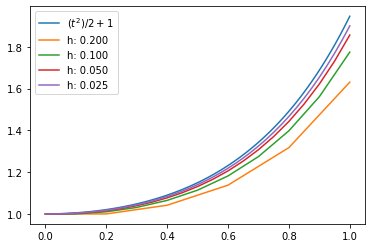

In [14]:
h_list = [0.2, 0.1, 0.05,0.025]
t_list = np.linspace(0, 1, 100)

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$(t^2)/2 + 1$')

for h in h_list:
    t, w = Euler_method(f, a, b, h, y_0)
    plt.plot(t, w, label='h: %.3f' % h)
    
plt.legend()
plt.show()

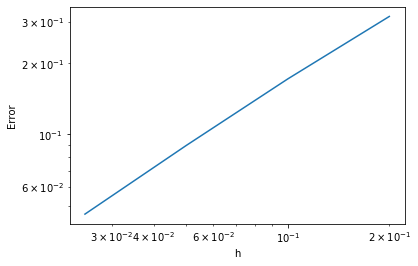

In [15]:
f_1 = exact_sol(1)
error_list = np.zeros(4)
for i, h in enumerate(h_list):
    t, w = Euler_method(f, a, b, h, y_0)
    error_list[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list)
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

# 显式梯形法

In [18]:
def Explicit_trapezoid_method(f, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + (f(t[i], w[i]) + f(t[i] + h, w[i] + h*f(t[i], w[i])))*(h/2)
        
    return t, w

In [19]:
a, b = 0, 1
h = 0.1
y_0 = 1

def f(x, y):
    return y

def exact_sol(x):
    return np.exp(x)
t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error2 = abs(true_value - w)

DF({"t": t, "w": w, "Error": error2, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.105171,1.105000,0.000171
0.2,1.221403,1.221025,0.000378
0.3,1.349859,1.349233,0.000626
0.4,1.491825,1.490902,0.000923
0.5,1.648721,1.647447,0.001275
0.6,1.822119,1.820429,0.001690
0.7,2.013753,2.011574,0.002179
0.8,2.225541,2.222789,0.002752


In [20]:
for i in range(7):
    h = 0.1/10**i
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    true_value = exact_sol(t)
    error = abs(true_value - w)
    print("h: ",h, "error at 1: ",error[-1])

h:  0.1 error at 1:  0.004200981850821073
h:  0.01 error at 1:  4.49658990882007e-05
h:  0.001 error at 1:  4.5270728232793545e-07
h:  0.0001 error at 1:  4.530157138304958e-09
h:  1e-05 error at 1:  2.7182727670105322e-05
h:  1e-06 error at 1:  4.076738946423575e-13
h:  1.0000000000000001e-07 error at 1:  5.897504706808832e-13


In [21]:
a, b = 0, 1
h = 0.2
y_0 = 1

def f(x, y):
    return x*y+x**3

def exact_sol(x):
    return 3*np.exp(x**2/2)-x**2-2

t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w)

DF({"t": t, "w": w, "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.2,1.020604,1.020800,0.000196
0.4,1.089861,1.090945,0.001084
0.6,1.231652,1.234044,0.002392
0.8,1.491383,1.494913,0.003530
1.0,1.946164,1.949356,0.003193


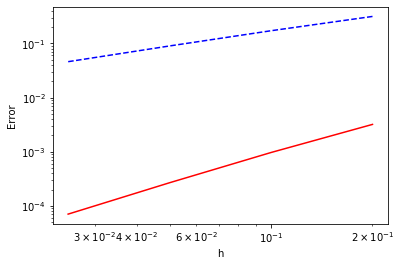

In [22]:
f_1 = exact_sol(1)
error_list2 = np.zeros(4)
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list2[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list,"b--",h_list, error_list2,"r-")
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

# 二阶泰勒方法

In [23]:
def Taylor_method_2_order(f, f_diff_1, a, b, h, y_0):
    n = int((b - a)/h)
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = y_0
    
    for i in range(n):
        w[i+1] = w[i] + h*f(t[i], w[i]) + (0.5 * h**2)*f_diff_1(t[i], w[i])
        
    return t, w

In [24]:
def diff_f(t,y):
    return y

a, b = 0, 1
h = 0.1
y_0 = 1

def f(x, y):
    return y

def exact_sol(x):
    return np.exp(x)
t, w = Taylor_method_2_order(f, diff_f,a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w)

DF({"t": t, "w": w, "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]


,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.1,1.105171,1.105000,0.000171
0.2,1.221403,1.221025,0.000378
0.3,1.349859,1.349233,0.000626
0.4,1.491825,1.490902,0.000923
0.5,1.648721,1.647447,0.001275
0.6,1.822119,1.820429,0.001690
0.7,2.013753,2.011574,0.002179
0.8,2.225541,2.222789,0.002752


In [25]:
for i in range(7):
    h = 0.1/10**i
    t, w = Taylor_method_2_order(f, diff_f,a, b, h, y_0)
    true_value = exact_sol(t)
    error = abs(true_value - w)
    print("h: ",h, "error at 1: ",error[-1])

h:  0.1 error at 1:  0.004200981850820629
h:  0.01 error at 1:  4.496589908686843e-05
h:  0.001 error at 1:  4.5270728632473833e-07
h:  0.0001 error at 1:  4.530136710201305e-09
h:  1e-05 error at 1:  2.7182727719399224e-05
h:  1e-06 error at 1:  6.94999613415348e-13
h:  1.0000000000000001e-07 error at 1:  3.7268854669036955e-11


In [26]:
a, b = 0, 1
h = 0.2
y_0 = 1

def f(x, y):
    return x*y+x**3

def diff_f(x,y):
    return y+3*x**2+x*(x*y+x**3)

def exact_sol(x):
    return 3*np.exp(x**2/2)-x**2-2

t, w = Taylor_method_2_order(f,diff_f, a, b, h, y_0)
true_value = exact_sol(t)
error = abs(true_value - w)

DF({"t": t, "w": w, "Error": error, 'True value': true_value}).set_index('t')[['True value', 'w', 'Error']]

,True value,w,Error
t,,,
0.0,1.000000,1.000000,0.000000
0.2,1.020604,1.020000,0.000604
0.4,1.089861,1.086048,0.003813
0.6,1.231652,1.221040,0.010612
0.8,1.491383,1.468169,0.023214
1.0,1.946164,1.900224,0.045940


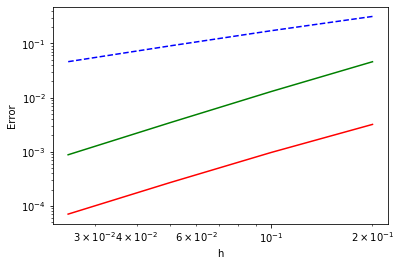

In [27]:
f_1 = exact_sol(1)
error_list3 = np.zeros(4)
for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f,diff_f, a, b, h, y_0)
    error_list3[i] = abs(w[-1] - f_1)

plt.plot(h_list, error_list,"b--",h_list, error_list2,"r-",h_list,error_list3,"g-")
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()

# 例3

In [36]:
a, b = -10,0
y_0 = 1/10001.0
#y_0 = 0.5

def f(x, y):
    return -4.0*x**3*y**2

def diff_f(x,y):
    return -12.0*x**2*y**2+32.0*x**6*y**3

def exact_sol(x):
    return 1.0/(1+x**4)

f_0 = exact_sol(0)
h_list = [0.1, 0.01, 0.001,0.0001,0.00001]
error_list1 = np.zeros(5)
error_list2 = np.zeros(5)
error_list3 = np.zeros(5)

for i, h in enumerate(h_list):
    t, w = Euler_method(f, a, b, h, y_0)
    error_list1[i] = abs(w[-1] - f_0)
    
for i, h in enumerate(h_list):
    t, w = Explicit_trapezoid_method(f, a, b, h, y_0)
    error_list2[i] = abs(w[-1] - f_0)

for i, h in enumerate(h_list):
    t, w = Taylor_method_2_order(f,diff_f, a, b, h, y_0)
    error_list3[i] = abs(w[-1] - f_0)

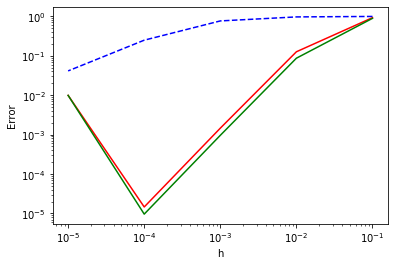

In [37]:
plt.plot(h_list, error_list1,"b--",h_list, error_list2,"r-",h_list,error_list3,"g-")
plt.xlabel('h')
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.show()